In [1]:
# Some neccessary Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
%load_ext tensorboard

In [2]:
# Load the IRIS Dataset
Breast_cancer = pd.read_csv('Breast_cancer.csv')
Breast_cancer.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
Breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Statistical summary of the iris dataset
Breast_cancer.describe() 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Check for missing value
Breast_cancer.isnull().sum()/len(Breast_cancer)*100

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

As you can see the result , there are no missing values

In [6]:
Breast_cancer.drop(['Unnamed: 32', 'id'] , axis=1 , inplace=True)

# Vizualization of the data

Text(0.5, 1.0, 'Distribution of diagnosis')

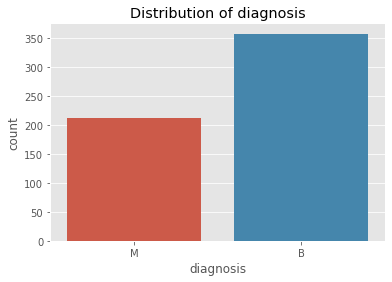

In [7]:
# Target Variable 
plt.style.use('ggplot')
sns.countplot(data = Breast_cancer , x = 'diagnosis')
plt.title('Distribution of diagnosis')

### Data preprocessing Steps

In [8]:
Breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
# Split data into target & predictors
X = Breast_cancer.iloc[: , 1:]
y = Breast_cancer.iloc[: , 0]

In [10]:
print(y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [11]:
# One hot encoding
enc = OneHotEncoder()
y = enc.fit_transform(np.array(y).reshape(-1, 1)).toarray()

In [12]:
# Standard Scaling ,important for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split the dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=4)

n_features = X.shape[1]
n_classes = y.shape[1]

In [14]:
# Convert the target labels to one-hot encoded format
#Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=2)

In [15]:
#Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=2)

In [16]:
# neural network architecture for adaptive activation function (AF) selection

initializer0 = keras.initializers.RandomUniform(minval = -0.003, maxval =0)
initializer1 = keras.initializers.RandomUniform(minval = -0.003, maxval =0)


class Adaact(keras.layers.Layer):
    def __init__(self):
        super(Adaact, self).__init__()
        self.k0 = self.add_weight(name='k0', shape = (), initializer=initializer0, trainable=True)
        self.k1 = self.add_weight(name='k1', shape = (), initializer=initializer1, trainable=True)
        
        
    def call(self, inputs):
        return self.k0 + tf.multiply(inputs, self.k1)

In [17]:
# Build model with fully connected layers with dropout regulation
model = Sequential()
model.add(layers.Dense(25, input_dim=n_features))
act = Adaact()
model.add(act)
model.add(layers.Dropout(0.1))
model.add(layers.Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                775       
                                                                 
 adaact (Adaact)             (None, 25)                2         
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 52        
                                                                 
Total params: 829
Trainable params: 829
Non-trainable params: 0
_________________________________________________________________


In [18]:
import datetime
batch_size = 5
epochs = 100

model.compile(loss="binary_crossentropy", optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics=["accuracy"])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)

Epoch 1/100
73/73 [==============================] - 1s 5ms/step - loss: 0.6350 - accuracy: 0.8352 - val_loss: 0.4730 - val_accuracy: 0.9341
Epoch 2/100
73/73 [==============================] - 0s 3ms/step - loss: 0.3406 - accuracy: 0.9231 - val_loss: 0.1620 - val_accuracy: 0.9341
Epoch 3/100
73/73 [==============================] - 0s 3ms/step - loss: 0.1771 - accuracy: 0.9478 - val_loss: 0.0968 - val_accuracy: 0.9670
Epoch 4/100
73/73 [==============================] - 0s 3ms/step - loss: 0.1297 - accuracy: 0.9615 - val_loss: 0.0742 - val_accuracy: 0.9670
Epoch 5/100
73/73 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9780 - val_loss: 0.0642 - val_accuracy: 0.9670
Epoch 6/100
73/73 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9808 - val_loss: 0.0591 - val_accuracy: 0.9780
Epoch 7/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0833 - accuracy: 0.9835 - val_loss: 0.0555 - val_accuracy: 0.9780
Epoch 8/100
7

In [19]:
# parameter updates during training
parameter_updates = history.history['loss']
print(parameter_updates)

[0.6349534392356873, 0.3406215012073517, 0.17709150910377502, 0.1296650916337967, 0.10094258189201355, 0.09284614026546478, 0.08327788859605789, 0.07675623893737793, 0.0806170105934143, 0.07590342313051224, 0.06877095997333527, 0.07111918926239014, 0.06989789754152298, 0.06817645579576492, 0.06413515657186508, 0.06355897337198257, 0.061946336179971695, 0.06371080130338669, 0.06546049565076828, 0.06059466302394867, 0.05902333930134773, 0.060115572065114975, 0.05856536328792572, 0.05741263926029205, 0.05959489196538925, 0.055294349789619446, 0.05783805623650551, 0.05871276557445526, 0.057707786560058594, 0.05472231283783913, 0.05490560829639435, 0.049753587692976, 0.052901074290275574, 0.05475938692688942, 0.053409405052661896, 0.050507768988609314, 0.05239620432257652, 0.05116399750113487, 0.04877308011054993, 0.049100201576948166, 0.050247952342033386, 0.05197162926197052, 0.048311930149793625, 0.05034472793340683, 0.047428011894226074, 0.04576820507645607, 0.043535880744457245, 0.0481

In [20]:
# final parameter values at the end of training
final_parameter_values = model.get_weights()
print(final_parameter_values)

[array([[ 1.23450927e-01,  4.58913520e-02, -2.52276421e-01,
         3.50122869e-01, -6.57877624e-02,  2.28300422e-01,
        -2.80018034e-03, -8.83150250e-02, -1.84216172e-01,
         1.47627980e-01,  2.59382933e-01,  2.36931041e-01,
        -3.27405721e-01, -5.51381670e-02,  6.66460767e-02,
         1.65805459e-01, -1.71773955e-01,  3.07699084e-01,
         3.93600427e-02,  2.06660647e-02, -2.52308935e-01,
         8.32853839e-02, -1.11746512e-01, -9.33713689e-02,
        -1.27872646e-01],
       [-1.02036029e-01, -2.12559864e-01, -1.02727354e-01,
         6.77731782e-02,  4.01404262e-01, -9.91492718e-02,
         3.70523602e-01, -1.96405619e-01,  1.68170966e-02,
         5.98181747e-02,  3.03621799e-01,  8.62339884e-02,
        -1.08928718e-02,  3.80433500e-01, -2.41903424e-01,
        -1.07684776e-01,  2.30486721e-01, -1.17857188e-01,
        -2.00407207e-01, -1.89179964e-02,  3.13095242e-01,
        -1.33217439e-01,  1.04550958e-01,  1.70985043e-01,
        -1.74757257e-01],
   

In [21]:
total_parameters = model.count_params()
print(total_parameters)

829


In [22]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.23323659598827362
Test accuracy: 0.9385964870452881


In [23]:
# Optimal Value of k0,k1 & k2
print("AF coefficients (weights) {}".format(act.get_weights()))

AF coefficients (weights) [-0.07028431, -0.5700452]


In [24]:
from sklearn.metrics import f1_score
# training and test loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
print(train_loss[-1])

0.029586510732769966


In [26]:
# training and testing accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [27]:
print(train_accuracy[-1])

0.9862637519836426


In [28]:
# predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

4/4 [==============================] - 0s 6ms/step


In [29]:
#  F1-Score
f1 = f1_score(np.argmax(Y_test, axis=1), y_pred, average='weighted')

In [30]:
# Print test loss, test accuracy, and F1-Score
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("F1-Score:", f1)

Test loss: 0.23323659598827362
Test accuracy: 0.9385964870452881
F1-Score: 0.939708971943779


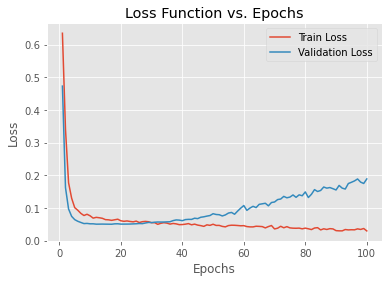

In [31]:
# Plot of loss function vs. epochs
plt.plot(range(1, epochs + 1), train_loss, label='Train Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function vs. Epochs')
plt.legend()
plt.show()